# MNIST with Convolutional Neural Network (CNN)
## Data pre-processing

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\Users\Chiu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [5]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

## Build the Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(filters=16, # number of filter weight: 16
                 kernel_size=(5,5), # size of the filter weight: 5x5
                 padding='same', # keep the size of input the same after convolution
                 input_shape=(28, 28, 1), # 1st, 2nd dimension: size of input picture;
                 activation='relu'))

In [32]:
model.add(MaxPooling2D(pool_size=(2, 2))) # downsampling from 28x28 to 14x14

In [33]:
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [34]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [35]:
model.add(Dropout(0.25))

In [36]:
model.add(Flatten()) # Flatten 36 7x7 input to 1764 (36x7x7) 1 dimensional vector

In [37]:
model.add(Dense(128, activation='relu'))

In [38]:
model.add(Dropout(0.5))

In [39]:
model.add(Dense(10, activation='softmax'))

In [40]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               225920    
__________

## Start the training

In [41]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
train_history = model.fit(x=x_Train4D_normalize,
                          y=y_TrainOneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=300,
                          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 35s - loss: 0.4953 - acc: 0.8460 - val_loss: 0.0983 - val_acc: 0.9713
Epoch 2/10
 - 35s - loss: 0.1400 - acc: 0.9581 - val_loss: 0.0699 - val_acc: 0.9788
Epoch 3/10
 - 35s - loss: 0.1044 - acc: 0.9687 - val_loss: 0.0539 - val_acc: 0.9833
Epoch 4/10
 - 35s - loss: 0.0849 - acc: 0.9743 - val_loss: 0.0452 - val_acc: 0.9867
Epoch 5/10
 - 35s - loss: 0.0719 - acc: 0.9786 - val_loss: 0.0437 - val_acc: 0.9868
Epoch 6/10
 - 35s - loss: 0.0625 - acc: 0.9813 - val_loss: 0.0401 - val_acc: 0.9885
Epoch 7/10
 - 35s - loss: 0.0576 - acc: 0.9829 - val_loss: 0.0343 - val_acc: 0.9900
Epoch 8/10
 - 36s - loss: 0.0519 - acc: 0.9838 - val_loss: 0.0353 - val_acc: 0.9895
Epoch 9/10
 - 36s - loss: 0.0466 - acc: 0.9854 - val_loss: 0.0319 - val_acc: 0.9904
Epoch 10/10
 - 35s - loss: 0.0435 - acc: 0.9860 - val_loss: 0.0317 - val_acc: 0.9898


In [43]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

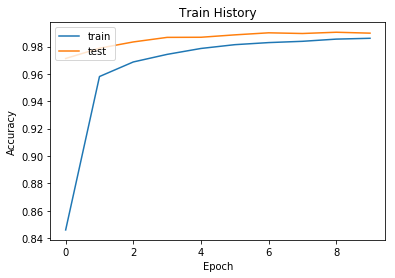

In [44]:
show_train_history('acc','val_acc')

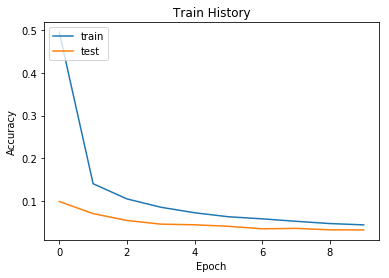

In [45]:
show_train_history('loss','val_loss')

## Evaluation

In [46]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 3s 284us/step


0.9906

## Prediction

In [48]:
prediction = model.predict_classes(x_Test4D_normalize)

In [49]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

### Show the first 10 predictions

In [50]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

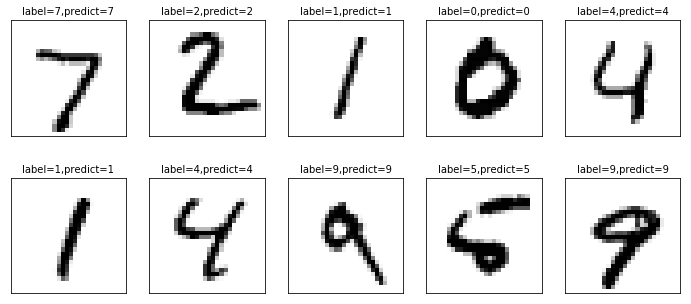

In [51]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

## Confusion (error) matrix

In [52]:
import pandas as pd
pd.crosstab(y_Test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,0,0,0,0,3,1,2,0
1,0,1132,1,0,0,1,1,0,0,0
2,1,1,1027,0,1,0,0,2,0,0
3,1,0,0,1002,0,4,0,1,2,0
4,0,0,0,0,978,0,1,0,0,3
5,1,0,0,5,0,883,2,0,0,1
6,3,3,0,0,3,3,945,0,1,0
7,0,2,6,1,0,0,0,1008,2,9
8,3,1,2,1,1,1,1,2,961,1
